# Проект по выявлению профилей покупателей и анализу товарного ассортимента интернет-магазина товаров для дома

## Описание проекта

Заказчик: Интернет-магазин товаров для дома «Пока все ещё тут»
 
Описание данных:  Датасет описывает транзакции интернет-магазина.

- date — дата заказа;
- customer_id — идентификатор покупателя;
- order_id — идентификатор заказа;
- product — наименование товара;
- E-commerce — выявление профилей потребления 
- quantity — количество товара в заказе;
- price — цена товара

В датасете 7474 записи.

Цель исследования:
- Сформировать рекомендации по рекламной рассылке. Определить каким категориям покупателей какие категории товаров в какие месяцы наиболее актуальны. Предполагается, что введение грамотной рассылки приведет к увеличению среднего чека и выручки с покупателя. 

Провести предобработку данных:
- Проверить наличие пропусков
- Проверить наличие явных и неявных дубликатов
- Изменить тип данных у столбца date
- Добавить столбец с категориями товаров. Для этого выбрать категории  и к каждой сформировать список ключевых слов. Далее отфильтровать товар в необходимую категорию
- Добавить столбец с категориями покупателей. Для этого провести RFM-анализ. 

Провести исследовательский анализ данных:
- Проверить данными за какой период владеем. 
- Проверить сколько заказов в среднем делает пользователь. Как это меняется с течением времени, есть ли аномалии. Построить графики. 
- Проверить сколько  товаров в заказе в среднем. Как это меняется с течением времени, есть ли аномалии. Построить графики.
- Рассчитать средний чек. Как он меняется с течением времени, есть ли аномалии. Построить графики.
- Рассчитать среднюю выручку с покупателя. Как она меняется с течением времени, есть ли аномалии. Построить графики.
- Проверить сезонность товаров из категорий по каждому сегменту покупателей

В исследованиях выше учитывать категории товаров или пользователей. Например, выручку с одного покупателя рассчитывать для трех категорий клиентов и показывать на одном графике все три категории для возможности сравнения. 

Проверка гипотез:

Есть разница в среднем чеке пользователей, которые покупают единично и которые покупают регулярно

- H_0: Средний чек групп пользователей не отличается
- H_a: Средний чек пользователей, которые покупают регулярно выше, чем у пользователей, которые покупают единично

alpha = 0.05

Есть разница в количестве категорий товаров в одном заказе между пользователями, которые покупают единично и которые покупают регулярно:

- H_0: Количество категорий в одном заказе не отличается 
- H_a: Количество категорий в одном заказе больше у пользователей, которые покупают регулярно, чем у тех, кто покупает единично

alpha = 0.05

## Загрузка библиотек и данных

In [1]:
import warnings 
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats as st
import numpy as np

In [2]:
try:
    df = pd.read_csv(r"D:\Проекты Яндекс.Практикум\DA\06 Выпускной проект\ecom_dataset_upd.csv")
except: 
    df = pd.read_csv('https://code.s3.yandex.net/datasets/ecom_dataset_upd.csv')

In [3]:
df.head()

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB


### Изменение типа данных у столбца date

In [5]:
df['date']= pd.to_datetime(df['date'],format="%Y%m%d%H")
df['date']=df['date'].dt.date
df['date'] = df['date'].astype('datetime64[ns]')

In [6]:
df['product'] = df['product'].str.lower()
#приведение названий товаров  к нижнему регистру

In [7]:
df

,date,customer_id,order_id,product,quantity,price
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0
...,...,...,...,...,...,...
7469,2020-01-30,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) черниченский черри № 116 сорт...,2,38.0
7470,2020-01-30,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,дендробиум санок анна грин 1 ствол d-12 см,1,869.0
7471,2020-01-31,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,подставка для обуви резиновая attribute 80x40 ...,1,354.0
7472,2020-01-31,cdd17932-623e-415f-a577-3b31312fd0e2,102002,тагетис крупноцветковый рассада однолетних цве...,1,128.0


### Удаление явных и неявных дубликатов

In [8]:
df.duplicated().sum()

966

In [9]:
df=df.drop_duplicates()

После приведения названий товаров к нижнему регистру, выявлены и удалены явные дубликаты

In [10]:
duplicateRows = df[df.duplicated([ 'order_id', 'product', 'quantity', 'price'])]
duplicateRows

,date,customer_id,order_id,product,quantity,price
58,2018-10-02,b731df05-98fa-4610-8496-716ec530a02c,68474,доска гладильная eurogold professional 130х48 ...,1,3299.0
63,2018-10-03,b731df05-98fa-4610-8496-716ec530a02c,68474,доска гладильная eurogold professional 130х48 ...,1,3299.0
152,2018-10-09,3de09660-90bc-4a28-aaf1-34c8435fe59c,68574,"таз пластмассовый 15,0 л пищевой овальный ""ekk...",1,209.0
153,2018-10-09,3de09660-90bc-4a28-aaf1-34c8435fe59c,68574,"таз пластмассовый 18,0 л пищевой (иж), 1404047",1,194.0
154,2018-10-09,3de09660-90bc-4a28-aaf1-34c8435fe59c,68574,"таз пластмассовый 20,0 л пищевой (минеральные ...",1,277.0
...,...,...,...,...,...,...
6687,2019-10-24,7f76ce2d-fb60-471f-8820-53ad6197caaa,73002,эвкалипт гунни d-14 см h-70 см,2,524.0
6703,2019-10-28,b89ace7f-7017-408c-8755-c4ff39b50980,73104,циперус зумула d-12 см h-25 см,2,112.0
6705,2019-10-28,57cc80a2-2610-4eef-9457-e7c3bf0c72f0,70960,сумка-тележка 2-х колесная gimi argo красная,1,1087.0
6728,2019-10-31,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"таз пластмассовый со стиральной доской (иж), 1...",1,397.0


In [11]:
df.drop_duplicates(subset=['order_id', 'product', 'quantity', 'price'],  inplace= True )

Выявили и удалили дубликаты внутри заказов. Случаи, когда один и тот же товар в заказе дублировался. 

In [12]:
df_test_2  = df.groupby('order_id').agg({'date':'nunique'}).reset_index().sort_values(by = 'date', ascending = False)
df_test_2 = df_test_2[df_test_2['date'] >1]
df_test_2_list = df_test_2['order_id'].to_list()
df_test_2_list

[70031,
 71148,
 71426,
 70903,
 70186,
 70995,
 69282,
 69750,
 70463,
 69807,
 69527,
 14898,
 70769,
 69485,
 71143,
 71413,
 14833,
 70318,
 14500,
 70742]

In [13]:
df_df = df.query('order_id in @df_test_2_list')
df_df

,date,customer_id,order_id,product,quantity,price
482,2018-10-28,3ee43256-af7d-4036-90d4-eeefa1afc767,14500,многолетнее растение душица-орегано розовый об...,1,89.0
483,2018-10-28,3ee43256-af7d-4036-90d4-eeefa1afc767,14500,многолетнее растение тимьян-чабрец розовый объ...,1,89.0
484,2018-10-28,3ee43256-af7d-4036-90d4-eeefa1afc767,14500,пеларгония зональная диам. 12 см белая полумах...,1,188.0
485,2018-10-28,3ee43256-af7d-4036-90d4-eeefa1afc767,14500,пеларгония зональная диам. 12 см розовая с мал...,1,188.0
486,2018-10-28,3ee43256-af7d-4036-90d4-eeefa1afc767,14500,пеларгония зональная диам. 12 см сиреневый пол...,1,188.0
...,...,...,...,...,...,...
5764,2019-07-09,3ebc0246-48a6-4932-a759-f492c4a7d879,14898,рассада зелени для кухни петрушка корневая сах...,1,128.0
5765,2019-07-09,3ebc0246-48a6-4932-a759-f492c4a7d879,14898,рассада зелени для кухни тимьян сильвер квин д...,1,120.0
5766,2019-07-09,3ebc0246-48a6-4932-a759-f492c4a7d879,14898,рассада пряной травы лавр в горшке 9 см,1,45.0
5767,2019-07-09,3ebc0246-48a6-4932-a759-f492c4a7d879,14898,рассада пряной травы эвкалипт сильвердроп в го...,1,52.0


In [14]:
df_df['order_id'].nunique()

20

In [15]:
duplicateRows = df_df[df_df.duplicated([ 'product'])]
duplicateRows 

,date,customer_id,order_id,product,quantity,price
1232,2018-12-17,bbb32131-2d92-4c1e-aa28-41723f7bc26c,69282,кружка прозрачная 250 мл h8437 luminarc франция,12,44.0
1692,2019-02-04,eec973c9-6ae9-4c1b-b1c7-a2718fde2f84,70031,муляж красное яблоко мини полиуретан d-6 см,1,59.0
2205,2019-03-06,036edc2c-d0ad-4c71-99f6-226db1b883f4,70463,салатник luminarc поэма анис 12 см j1349,1,239.0
2347,2019-03-15,161ec5a3-e6df-4a8c-98ad-089aeac5bcc3,70742,ранункулус клуни ханои 45 см нидерланды 10 шту...,10,172.0
2571,2019-03-31,977bba90-df53-4513-b5db-30d6ea1fbca1,70769,искусственный цветок подснежник пластиковый белый,25,32.0
3344,2019-05-01,718316fc-bdf3-4d1d-b8f1-a5c763238ff4,70903,средство против засоров в системах водопровода...,1,142.0
3888,2019-05-17,2c2f1c82-d5f8-462a-b3ea-8ab375a8fa0d,71413,карниз для ванной комнаты виолет раздвижной 28...,2,224.0
4122,2019-05-29,ae6940d3-a1c7-4997-8853-a5b8afc60d51,71148,гладильная доска ника гранд 122х42 см нг,2,1799.0
4390,2019-06-03,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"рассада кабачка сорт аэронавт, кассета по 6шт",2,120.0
4391,2019-06-03,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,рассада кабачка сорт белогор кассета 6 шт e6,2,120.0


In [16]:
duplicateRows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 1232 to 5803
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         21 non-null     datetime64[ns]
 1   customer_id  21 non-null     object        
 2   order_id     21 non-null     int64         
 3   product      21 non-null     object        
 4   quantity     21 non-null     int64         
 5   price        21 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 1.1+ KB


In [17]:
duplicateRows['order_id'].nunique()

10

Создали отдельный датафрейм с заказами, которым соответствует больше, чем одна дата = df_df. На его основе создали датафрейм с дубликатами по значению product = duplicateRows.
Количество уникальных номеров заказов в df_df - 20, в duplicateRows = 10. То есть только у половины заказов были дублированные товары. 
На основании этих данных не можем сделать вывод, что при добавлении товара в заказ, старый дублировался.


In [18]:
df = df[df.order_id.isin (df_test_2_list) == False ]

Выявлены и удалены заказы, которым соответствоовала больше, чем одна дата

In [19]:
df_test_3  = df.groupby('order_id').agg({'customer_id':'nunique'}).reset_index().sort_values(by = 'customer_id', ascending = False)
df_test_3 = df_test_3[df_test_3['customer_id'] >1]
df_test_3_list = df_test_3['order_id'].to_list()
df_test_3_list

[]

In [20]:
df = df[df.order_id.isin (df_test_3_list) == False ]

Не обнаружено заказов, которым бы соответствовал более, чем один id покупателя

In [21]:
df['month_year'] = df['date'].dt.to_period('M')

Добавлен столбец с месяцем и годом для дальнейшего постоения графиков

### Добавление столбца с категориями товаров

In [22]:
plant = ['растение', 'циперус', 'радермахера', 'хризолидокарпус', 'шеффлера', 'рассада', 'нолина', 'дендробиум', 'пеларгония', 'настурция', 'укроп', 'сорт', 'новогоднее дерево', 'вербена', 'гвоздика', 'юкка', 'эвкалипт',
        'кампанула', 'калатея', 'глоксиния', 'азалия', 'гортензия', 'хризантема', 'аспарагус', 'кашпо', 'афеляндра', 'молодило',  'фиалка', 'мелисса','роза', 
        'бегония','розмарин', 'хлорофитум', 'бальзамин', 'крассула', 'примула', 'калоцефалус', 'кореопсис','космея', 'флокс', 'цинерария', 'фаленопсис', 'пуансетия', 'гиностемма', 'ель',
        'кипарисовик', 'антуриум', 'аптения', 'пуансеттия', 'скиммия', 'петрушка', 'базилик', 'петуния', 'эхеверия', 'суккулент', 'адиантум', 'котовник', 'арбуз сибирские огни', 'цикламен', 'мирт', 'тимьян', 'гардения', 
         'цинния', 'пиретрум', 'бархатцы', 'морковь', 'незабудка', 'физостегия', 'ранункулус', 'огурец','алиссум', 'годеция', 'календула', 'лапчатка', 'эшшольция', 'в горшке', 'энотера', 'кодонанта', 'клубника',
        'фуксия', 'гипсофила', 'аквилегия', 'виола', 'вербейник', 'горох', 'земляника', 'седум', 'томат', 'калла', 'платикодон', 'овсянница', 'тюльпан', 'калибрахоа', 'змееголовник', 'георгина', 'смолевка', 'ясколка',
        'эхинацея', 'колокольчик', 'кориандр', 'лилейник', 'папоротник', 'дыня', 'виноград', 'лобелия', 'рукола', 'капуста', 'арбуз', 'хоста', 'монарда', 'гайлардия', 'вероника', 'рудбекия', 'ромашка', 'барвинок',
        'осина', 'астра', 'бузульник', 'камнеломка', 'солидаг', 'бадан', 'лен', 'лаватера', 'анемона', 'валериана', 'любисток', 'табак', 'шалфей', 'вигна', 'd-']

clothing_care = ['гладильная', 'сушилка', 'подрукавник',  'утюг', 'ведро', 'для глажения', 'для ведра',  'подголовник', 'ключница', 'для гладильной',       'гладильной']

bag = ['сумка-тележка','сумка', 'тележка', 'для тележки']

storage = ['кофр', 'вешалка',  'плечики', 'короб',   'полки', 'корзинка', 'корзина', 'подставка для цветов', 'чехол', 'контейнер','хранения', 'вешалок', 'вешалки', 'лоток', 'таз']


repair = ['петля приварная гаражная', 'крепеж', 'набор сверел','сварка', 'угольник', 'стремянки', 'стяжка', 'штангенциркуль', 'сверло-фреза', 'линейка', 'шило', 'ручка-скоба', 'фал капроновый', 'напильников', 'сверло',
         'фиксатор-шар', 'насадка на валик', 'основание для пробки', 'шпингалет', 'стремянка' , 'вентиляционная', 'петля-стрела', 'завертка' , 'уголок', 'петля', 'шнур хозяйственный']

clean = ['для полировки', 'антижир', 'для чистки', 'rozenbal', 'eurohouse', 'для посудомоечных машин', 'пылесос', 'совок', 'засоров', 'веник', 'швабра', 'швабре', 'инструмент', 'окномойка', 'для мусора', 'для швабры',
         'урна', 'с совком', 'губка','перчатки' , 'щетка-сметка', 'щетка']

textile = ['наматрасник', 'плед', 'скатерть', 'ковер', 'штора', 'салфетка', 'ковёр',  'штор', 'простыня', 'покрывало', 'одеяло', 'наматрацник', 'наволочк', 'коврик', 'пододеяльник',  'ткань']

dishes = ['нож', 'ложка', 'тарелка', 'вилка', 'кружка', 'сковорода','кастрюля', 'выпечки', 'орехоколка', 'сковороды', 'luminarc', 'фужер', 'фужеров', 'кувшин', 'толкушка', 'банка', 'миксер', 'чайник', 'салатников', 
          'салатник','стакан', 'миска', 'столовых', 'термос', 'разделочная', 'сотейник', 'котел', 'противень', 'хлебница', 'овощеварка', 'рыбочистка', 'терка', 'лопатка', 'мантоварка', 'овощечистка', 'кондитерский', 
         'ковш', 'картофелемялка', 'webber', 'для чеснока', 'электроштопор', 'соуса', 'для свч', 'блюдо', 'скалка', 'соковыжималка','венчик', 'тортница', 'кипятильник', 'сахарница', 'половник', 'набор посуды',
         'бидон', 'соковарка', 'пьезозажигалка', 'салфетница', 'подставка для яйца', 'для зажигалок', 'кухонные']


decor_and_furniture = ['муляж', 'декоративная', 'искусственный цветок', 'цветок искусственный', 'фоторамка', 'искусственная композиция', 'искусственная', 'подставка для обуви' , 'ящик почтовый', 'крючок', 'термометр',
                      'этажерка', 'стеллаж', 'обувница-3', 'полка','комод', 'светильник', 'фен', 'пуф', 'весы']

bathroom = ['зубная', 'мыло', 'халат',  'для ванной','ванну', 'ёрш', 'ерш','ванны', 'сантехники', 'стиральный', 'мытья', 'прищепок', 'мыла', 'пятен', 'ванн',
           'полотенце', 'вантуз', 'полотенец', 'увлажняющая маска', 'стирки', 'для унитаз']

In [23]:
def categorize(row):
    for i in plant:
        if i in row:
            return 'растения'
    for i in clothing_care:
        if i in row:
            return 'уход за одеждой'
    for i in dishes:
        if i in row:
            return 'посуда  и техника для кухни'    
    for i in decor_and_furniture:
        if i in row:
            return 'декор и мебель'   
    for i in bathroom:
        if i in row:
            return 'товары для ванной комнаты' 
    for i in clean:
        if i in row:
            return 'товары для уборки' 
    for i in repair:
        if i in row:
            return 'товары для ремонта'       
    for i in textile:
        if i in row:
            return 'текстиль'   
    for i in storage:
        if i in row:
            return 'хранение'    
    for i in bag:
        if i in row:
            return 'хозяйственные сумки'     
        

df['cat'] = df['product'].apply(categorize)

### Добавление столбца  с категориями покупателей

In [24]:
df['total'] = df['quantity']*df['price']

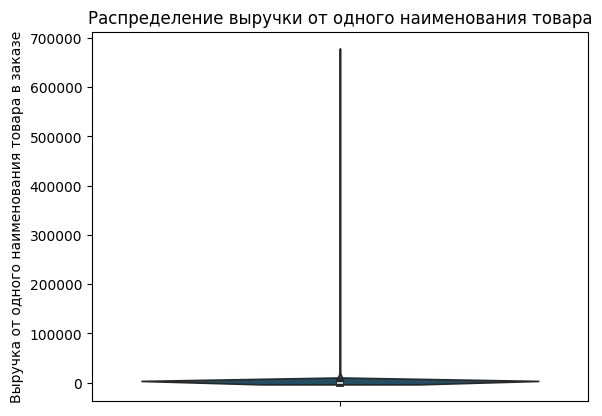

In [25]:
sns.violinplot( y='total', data=df, color = '#145374')
plt.title('Распределение выручки от одного наименования товара')
plt.ylabel('Выручка от одного наименования товара в заказе')
 
plt.show()

Видно, что существуют выбросы по выручке по строкам. Причина либо в количестве единиц товара, либо в стоимости

In [26]:
q = df['total'].astype("int").quantile(0.99)
q

6149.0

Менее 1% товаров в заказах имеют выручку более 6149. Рассмотрим позиции свыше 99-го процентиля подробнее

In [27]:
df_99  =  df[df['total'] >= q]
df_99 

,date,customer_id,order_id,product,quantity,price,month_year,cat,total
144,2018-10-08,9151d307-654c-4239-a888-ada5ca45f0b2,68571,набор вешалок для костюма 45см 4шт цвет: кремо...,37,202.0,2018-10,хранение,7474.0
375,2018-10-23,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68727,"веник сорго с деревянной ручкой с 4-мя швами, ...",17,530.0,2018-10,товары для уборки,9010.0
568,2018-11-01,aa42dc38-780f-4b50-9a65-83b6fa64e766,68815,муляж яблоко 9 см красное,170,51.0,2018-11,декор и мебель,8670.0
586,2018-11-02,0c5aaa88-e346-4f87-8f7a-ad8cbc04e965,68831,муляж яблоко 9 см красное,140,59.0,2018-11,декор и мебель,8260.0
654,2018-11-05,fc333417-1d11-4a2a-b946-0957ae0603e9,68872,сумка-тележка хозяйственная rolser mou041 malv...,1,7597.0,2018-11,хозяйственные сумки,7597.0
661,2018-11-06,1b2764ad-9151-4051-a46a-9b01b62e6335,68878,"урна уличная ""гео"", hobbyka/хоббика, 59*37,5см...",5,4874.0,2018-11,товары для уборки,24370.0
693,2018-11-07,6ae61023-9d87-4ff3-a02e-b42eab150140,68908,коврик придверный attribute nature кокосовый 6...,27,286.0,2018-11,текстиль,7722.0
1023,2018-11-29,8fba3604-ef57-4b9f-b2fe-3402fa8825c8,69156,набор ножей attribute chef 5 предметов akf522,64,457.0,2018-11,посуда и техника для кухни,29248.0
1241,2018-12-17,86c97bf1-c834-423e-9e38-8acda68f97e8,69417,гладильная доска leifheit airboard compact m p...,1,7424.0,2018-12,уход за одеждой,7424.0
1295,2018-12-21,f5b1251a-95a5-4d49-bba2-68fbf5890719,69499,чехол для одежды объемный hausmann с овальным ...,15,418.0,2018-12,хранение,6270.0


Часть товаров купили в количестве одной штуки, но цена этих позиций выше 6 тысяч. Часть товаров купили в большом количестве. Рассмотрим товарные позиции, которых купили от 5 единиц.

In [28]:
df_99.query('quantity >=5')

,date,customer_id,order_id,product,quantity,price,month_year,cat,total
144,2018-10-08,9151d307-654c-4239-a888-ada5ca45f0b2,68571,набор вешалок для костюма 45см 4шт цвет: кремо...,37,202.0,2018-10,хранение,7474.0
375,2018-10-23,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68727,"веник сорго с деревянной ручкой с 4-мя швами, ...",17,530.0,2018-10,товары для уборки,9010.0
568,2018-11-01,aa42dc38-780f-4b50-9a65-83b6fa64e766,68815,муляж яблоко 9 см красное,170,51.0,2018-11,декор и мебель,8670.0
586,2018-11-02,0c5aaa88-e346-4f87-8f7a-ad8cbc04e965,68831,муляж яблоко 9 см красное,140,59.0,2018-11,декор и мебель,8260.0
661,2018-11-06,1b2764ad-9151-4051-a46a-9b01b62e6335,68878,"урна уличная ""гео"", hobbyka/хоббика, 59*37,5см...",5,4874.0,2018-11,товары для уборки,24370.0
693,2018-11-07,6ae61023-9d87-4ff3-a02e-b42eab150140,68908,коврик придверный attribute nature кокосовый 6...,27,286.0,2018-11,текстиль,7722.0
1023,2018-11-29,8fba3604-ef57-4b9f-b2fe-3402fa8825c8,69156,набор ножей attribute chef 5 предметов akf522,64,457.0,2018-11,посуда и техника для кухни,29248.0
1295,2018-12-21,f5b1251a-95a5-4d49-bba2-68fbf5890719,69499,чехол для одежды объемный hausmann с овальным ...,15,418.0,2018-12,хранение,6270.0
1299,2018-12-21,6987e6d6-a63a-4ce2-a2d0-f424092d235e,69504,тележка багажная delta тбр-22 синий грузоподъе...,57,574.0,2018-12,хозяйственные сумки,32718.0
1518,2019-01-15,58a4c3cc-504f-43ea-a74a-bae19e665552,69830,простынь вафельная 200х180 см wellness rw180-0...,27,1755.0,2019-01,растения,47385.0


Найдена позиция "вантуз с деревянной ручкой d14 см красный", количество = 1000, стоимость за единицу 675р, итого выручка от товара = 675 000.

675 000 в 100 раз больше чем 99 процентиль. Удаляем эту позицию. Остальные считаем оптовыми покупателями. Разброс от 5 до 334 единиц одного товара. Оставляем в датасете и анализируем наравне с остальными данными.

In [29]:
df = df[df['total'] < 675000]

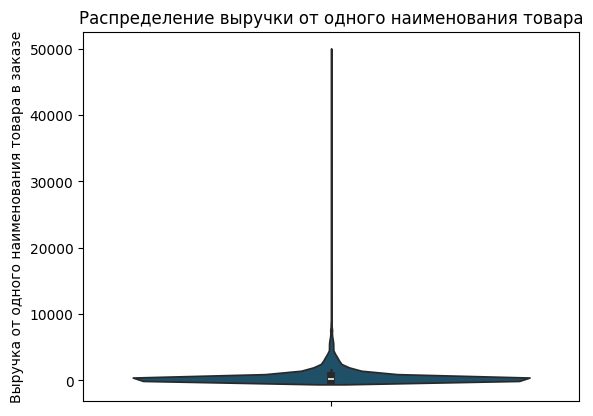

In [30]:
sns.violinplot( y='total', data=df, color = '#145374')
plt.title('Распределение выручки от одного наименования товара')
plt.ylabel('Выручка от одного наименования товара в заказе')
 
plt.show()

Максимальное значений total в районе 50 000 за одну позицию.

In [31]:
df_recency = df.groupby(by='customer_id', 
                        as_index=False)['date'].max()
df_recency.columns = ['customer_id', 'last_order_date']
recent_date = df_recency['last_order_date'].max()
df_recency['recency'] = df_recency['last_order_date'].apply(
    lambda x: (recent_date - x).days)

frequency_df = df.groupby(
    by=['customer_id'], as_index=False)['order_id'].nunique()
frequency_df.columns = ['customer_id', 'frequency']


monetary_df = df.groupby(by='customer_id', as_index=False)['total'].sum()
monetary_df.columns = ['customer_id', 'monetary']

rf_df = df_recency.merge(frequency_df, on='customer_id')
rfm_df = rf_df.merge(monetary_df, on='customer_id').drop(
    columns='last_order_date')
rfm_df.head()

,customer_id,recency,frequency,monetary
0,000d6849-084e-4d9f-ac03-37174eaf60c4,107,1,555.0
1,001cee7f-0b29-4716-b202-0042213ab038,349,1,442.0
2,00299f34-5385-4d13-9aea-c80b81658e1b,109,1,914.0
3,002d4d3a-4a59-406b-86ec-c3314357e498,369,1,1649.0
4,003bbd39-0000-41ff-b7f9-2ddaec152037,124,1,2324.0


Для каждого покупателя определили  давность даты последней покупки в днях, количество заказов и общую выручку, полученную от покупателя за весь период. 

In [32]:
q_recency_33 = rfm_df['recency'].astype("int").quantile(0.33)
q_recency_66 = rfm_df['recency'].astype("int").quantile(0.66)

def categorize_recency(row):
    
    recency = row['recency']
   
    
    if recency <= q_recency_33:
        return 3
    if   q_recency_33 < recency <= q_recency_66:
        return  2
    if recency > q_recency_66:
        return  1
rfm_df['R'] = rfm_df.apply(categorize_recency, axis=1) 
print('33 перцентиль', round(q_recency_33, 0))
print('66 перцентиль', round(q_recency_66, 0))

33 перцентиль 104.0
66 перцентиль 299.0


Проставили каждому покупателю значение Recency от 1 до 3 относительно 33 и 66 процентиля. Покупатели, которые совершили последнюю покупку недавно, то есть менее чем 33 перцентиль, получили оценку 3. Те, кто более, чем 66 перцентиль - оценку 1. Между этими значениями - оценка 2.

Здесь и далее используется деление по перцентилям на три равные части. В случае деления по 25 и 75 перцентилям, мало покупателей получали крайние оценки и не получалось выявить покупателей, например, со значением "333"

In [33]:
rfm_df['frequency'].describe()

count    2411.000000
mean        1.451680
std         2.699248
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       126.000000
Name: frequency, dtype: float64

In [34]:
q_frequency_33 = rfm_df['frequency'].astype("int").quantile(0.33)
q_frequency_66 = rfm_df['frequency'].astype("int").quantile(0.66)


def categorize_frequency(row):
    
    frequency = row['frequency']
   
    
    if frequency == q_frequency_33:
        return 1
    if frequency == q_frequency_66:
        return  2
    else:
        return  3
rfm_df['F'] = rfm_df.apply(categorize_frequency, axis=1) 

print('33 перцентиль', round(q_frequency_33, 0))
print('66 перцентиль', round(q_frequency_66, 0))

33 перцентиль 1.0
66 перцентиль 2.0


Так как 2/3 покупателей совершили не более 2 заказов, ранжирование frequency определено иначе, чем у recency. Покупатели, совершившие 1 заказ получили оценку 1, два заказа - оценку 2 и более 2 заказов - оценку 3.

In [35]:
rfm_df['monetary'].describe()

count      2411.000000
mean       1621.447290
std        4341.136226
min          15.000000
25%         389.000000
50%         836.000000
75%        1798.000000
max      159508.000000
Name: monetary, dtype: float64

In [36]:
q_monetary_33 = rfm_df['monetary'].astype("int").quantile(0.33)
q_monetary_66 = rfm_df['monetary'].astype("int").quantile(0.66)

def categorize_monetary(row):
    
    monetary = row['monetary']
   
    
    if monetary <= q_monetary_33:
        return 1
    if q_monetary_33 < monetary < q_monetary_66:
        return  2
    if monetary >= q_monetary_66:
        return  3
rfm_df['M'] = rfm_df.apply(categorize_monetary, axis=1) 
print('33 перцентиль', round(q_monetary_33, 0))
print('66 перцентиль', round(q_monetary_66, 0))

33 перцентиль 524.0
66 перцентиль 1318.0


Выручке с покупателя также проставлены ранги. Потратившим сумму меньше, чем 33 перцентиль проставлена оцена 1. Потратившим сумму большую, чем 66 перцентиль - оценка 3. Между этими значениями - оценка 2

In [37]:
rfm_df['RFM'] = rfm_df['R'].astype(str) + rfm_df['F'].astype(str) + rfm_df['M'].astype(str) 
rfm_df.head()

,customer_id,recency,frequency,monetary,R,F,M,RFM
0,000d6849-084e-4d9f-ac03-37174eaf60c4,107,1,555.0,2,1,2,212
1,001cee7f-0b29-4716-b202-0042213ab038,349,1,442.0,1,1,1,111
2,00299f34-5385-4d13-9aea-c80b81658e1b,109,1,914.0,2,1,2,212
3,002d4d3a-4a59-406b-86ec-c3314357e498,369,1,1649.0,1,1,3,113
4,003bbd39-0000-41ff-b7f9-2ddaec152037,124,1,2324.0,2,1,3,213


Создали столбец RFM, сочетающий все три оценки. Далее проверили, что удалось получить дастотчное количество каждой оценки по каждому параметру. 

In [38]:
departed  = ['111', '112', '113', '121', '122', '123', '131', '132']
#Ушедшие
perspective = ['133','233', '223']
#перспективные, покупали часто и дорого, но ушли давно или недавно
average = ['211','212','213','221','222','231', '232']
#Спящие. Перестали покупать примерно в середине рассматриваемого периода
new = ['311', '312', '313', '321', '322', '323', '331', '332']
#Активные, продолжают совершать покупки
vip = ['333']
#VIP, покупают часто, на большие суммы, последний раз покупали недавно

In [39]:
def assign_segment(row): 
    rfm = row['RFM']
    if  rfm in departed: 
        return 'Ушедшие' 
    elif rfm in perspective:  
        return 'Перспективные'
    elif rfm in average:  
        return 'Спящие'
    elif  rfm in new :  
        return 'Активные'
    elif  rfm in vip :  
        return 'VIP'

rfm_df['segment'] = rfm_df.apply(assign_segment, axis=1) 

rfm_df.head()

,customer_id,recency,frequency,monetary,R,F,M,RFM,segment
0,000d6849-084e-4d9f-ac03-37174eaf60c4,107,1,555.0,2,1,2,212,Спящие
1,001cee7f-0b29-4716-b202-0042213ab038,349,1,442.0,1,1,1,111,Ушедшие
2,00299f34-5385-4d13-9aea-c80b81658e1b,109,1,914.0,2,1,2,212,Спящие
3,002d4d3a-4a59-406b-86ec-c3314357e498,369,1,1649.0,1,1,3,113,Ушедшие
4,003bbd39-0000-41ff-b7f9-2ddaec152037,124,1,2324.0,2,1,3,213,Спящие


Определили ключевые категории покупателей для анализа и добавили столбец со значением. 

- Ушедшие покупатели. Давно не покупали. Данной категории при определении стратегии работы, будет уделено наименьшее внимание. В категорию не попали те, кто покупал давно, но часто и потратил много. Они пойдут в категорию "Перспективные"
- Перспективные. Покупали часто и на большие суммы. Либо сделали 2 заказа, но все же оставили в магазине большие суммы. Ранее были лояльны, можно попробовать вернуть
- Спящие. Последнюю покупку сделали от 100 до 300 дней назад. Еще не забыли магазин и совершенные покупки
- Активные. Клиенты, которые продолжают покупать и сейчас (последняя покупка менее 100 дней назад). Или новые клиенты, которые недавно совершили первую покупку. 
- VIP. Покупали часто  и оставили большую сумму. Крайняя покупка менее 100 дней назад

In [40]:
rfm_df.groupby('segment').agg({'customer_id':'count'}).sort_values(by = 'customer_id', ascending = False)

,customer_id
segment,
Ушедшие,813
Активные,796
Спящие,748
Перспективные,53
VIP,1


- В категорию VIP попал только один клиент
- Ушедших, активных и спящих примерно по ровну 
- Перспективных 53

In [41]:
df = df.merge(rfm_df, on = ['customer_id'], how='left')

In [42]:
df = df.drop(columns = ['R', 'F','M', 'RFM'])

In [43]:
segmet_count = df.groupby('segment').agg({'order_id':'count'}).reset_index()
sum_segment_count = segmet_count['order_id'].sum()
segmet_count['ratio'] = round((segmet_count['order_id']/sum_segment_count)*100, 2)
segmet_count

,segment,order_id,ratio
0,VIP,17,0.31
1,Активные,1528,27.78
2,Перспективные,578,10.51
3,Спящие,1797,32.67
4,Ушедшие,1581,28.74


### Вывод по обработке данных

- Удалили явные и неявные дубликты. Они выявились после приведения названий товаров к нижнему регистру. Также были удалены 20 заказов, в которых было более одной даты.
- Удалили один аномальный заказ на 675 000.
- Добавили столбец с категориями товаров по спискам ключевых слов, сформированных вручную
- Добавили столбец с категориями покупателей. Для этого использовали RFM-анализ. Проставили каждому покупателю значение частоты покупок, давности последней покупки и выручки. Границы для выбора значений выручки и давности покупок, выбрали исходя из 33го и 66го процентилей. В случае с частотой покупок деление было на 1, 2 и более заказов. 


## Исследовательский анализ данных

### Динамика выручки

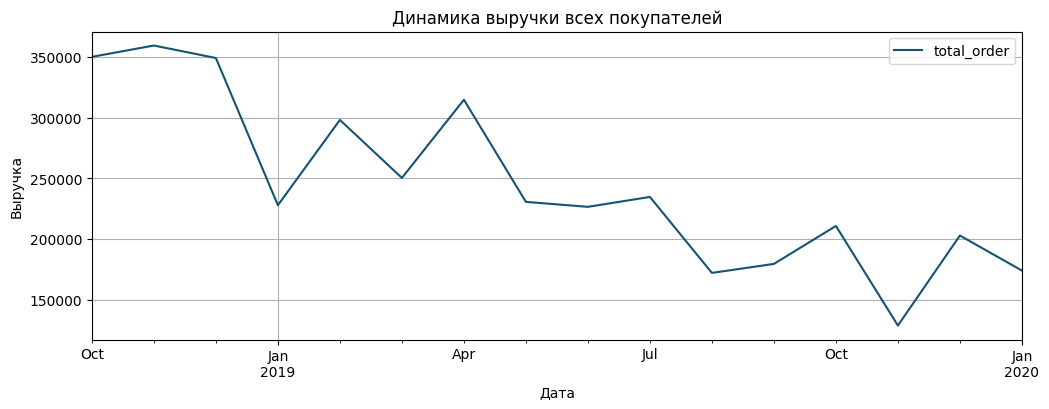

In [44]:
df_for_revenue_1 = df.drop(columns = ['customer_id','product', 'quantity', 'price', 'cat', 'total','recency','frequency','monetary','segment', 'date'])
df_for_revenue_1 = df_for_revenue_1.drop_duplicates()

df_for_revenue_2 = df.groupby(by='order_id')['total'].sum().reset_index()
df_for_revenue_2.columns = ['order_id', 'total_order']

df_revenue  = pd.merge(df_for_revenue_2, df_for_revenue_1, on="order_id", how= "outer")
df_revenue = df_revenue.drop(columns = ['order_id'])

df_revenue_month = df_revenue.groupby('month_year').agg({'total_order':'sum'})


df_revenue_month.plot(figsize=(12,4), grid=True, title='Динамика выручки всех покупателей', xlabel = 'Дата', ylabel = 'Выручка', color= '#145374')

plt.show()

Пик выручки пришелся на ноябрь 2018, более 350 000 в месяц. Наименьшая выручка ноябрь 2019 - ближе к 100 000. 

Спады: январь 2019, май-июнь 2019, август 2019, ноябрь 2019. Недостаточно данных за полные годы, чтобы сравнить динамику весной и летом. Подъем в ноябре вероятно связан с приближением нового года и покупкой подарков. Проседание выручки в январе, также связано с угасанием покупательской активности после новогодних праздников. Подъем продаж весной скорее всего означает покупку семян и рассады  к лету. Высокие продажи в октябре могут также говорить о заготовках луковиц цветов, которые хорошо сохраняются до весны.

### Средний чек

Средний чек по всем покупателям 1134.0
Медианное значение среднего чека по всем покупателям 1124.0


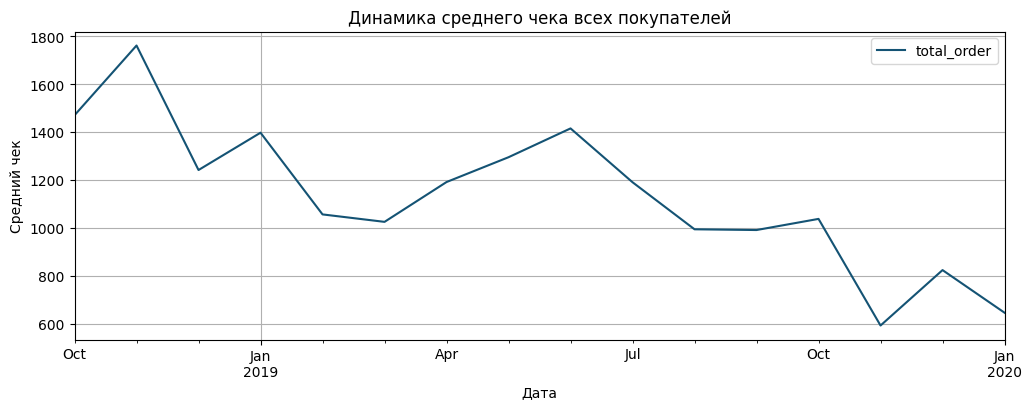

In [45]:
average_bill_df_month = df_revenue.groupby('month_year').agg({'total_order':'mean'})

print ('Средний чек по всем покупателям', round(average_bill_df_month['total_order'].mean(), 0))
print('Медианное значение среднего чека по всем покупателям', round(average_bill_df_month['total_order'].median(),0))

average_bill_df_month.plot(figsize=(12,4), grid=True,  title='Динамика среднего чека всех покупателей', xlabel = 'Дата', ylabel = 'Средний чек', color= '#145374')
plt.show() 

Самый высокий средний чек в ноябре 2018 - почти 1800, самый низкий в ноябре 2019. Обе ситуации аналогичны динамике выручки. Видим пик среднего чека в июне 2019 - 1400. Можно сравнить средний чек в январе 2019 - примерно 1400 и в январе 2020 - примерно 600. Падение примерно в 2 раза. В целом средний чек падает с небольшими скачками.

### Средняя выручка с покупателя

Средняя выручка с покупателя 1917.0
Медианное значение средней выручки с покупателя 1763.0


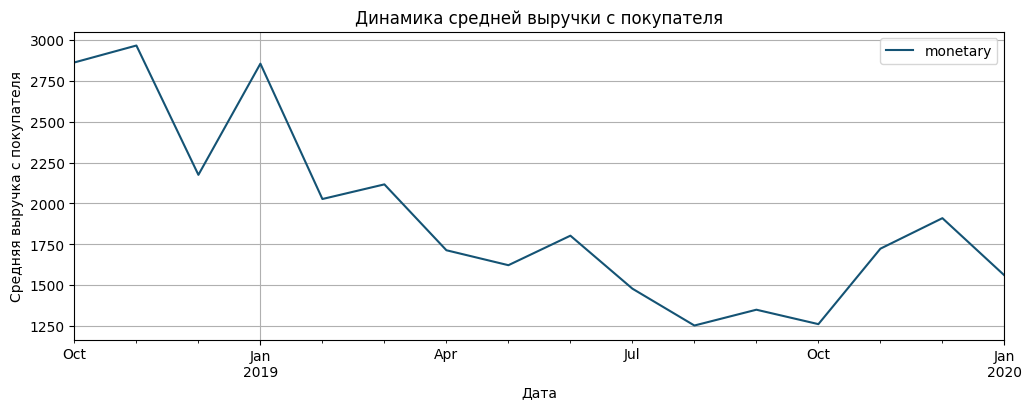

In [46]:
df_revenue_per_cl = df.drop(columns = ['order_id','product', 'quantity', 'price', 'cat', 'total','recency','frequency','segment', 'date'])
df_revenue_per_cl = df_revenue_per_cl.drop_duplicates()

df_revenue_per_cl_month =  df_revenue_per_cl.groupby('month_year').agg({'monetary':'mean'})

print ('Средняя выручка с покупателя', round(df_revenue_per_cl_month['monetary'].mean(), 0))
print ('Медианное значение средней выручки с покупателя', round(df_revenue_per_cl_month['monetary'].median(), 0))


df_revenue_per_cl_month.plot(figsize=(12,4), grid=True, title='Динамика средней выручки с покупателя', xlabel = 'Дата', ylabel = 'Средняя выручка с покупателя', color= '#145374')

plt.show() 

Самая высокая выручка с покупателя в ноябре 2018 - примерно 3000. Падения выручки с покупателя еще заметнее, чем в случае с общей выручкой и средним чеком. Похоже магазин работал за счет единичных новых покупателей. То есть покупатели не возвращались или возвращались единицы. Рост начинается снова в ноябре 2019 перед новым годом, но в январе 2020 прогнозируемо снова падает. У этого показателя самый плохой месяц не только октябрь 2019, но и август 2019.

### Анализ категорий товаров

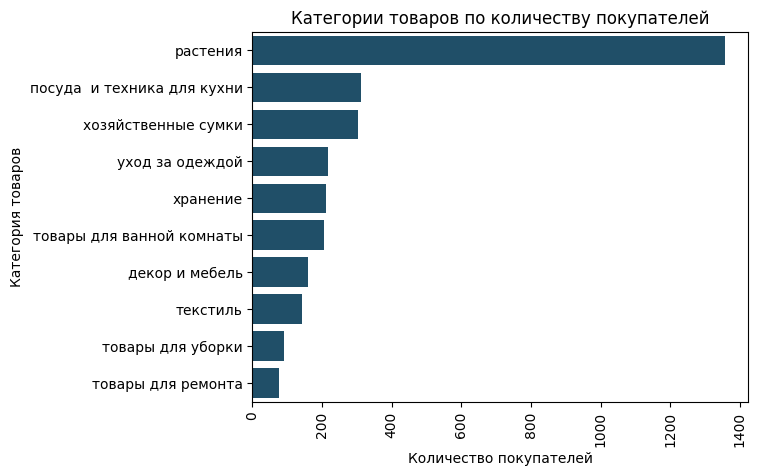

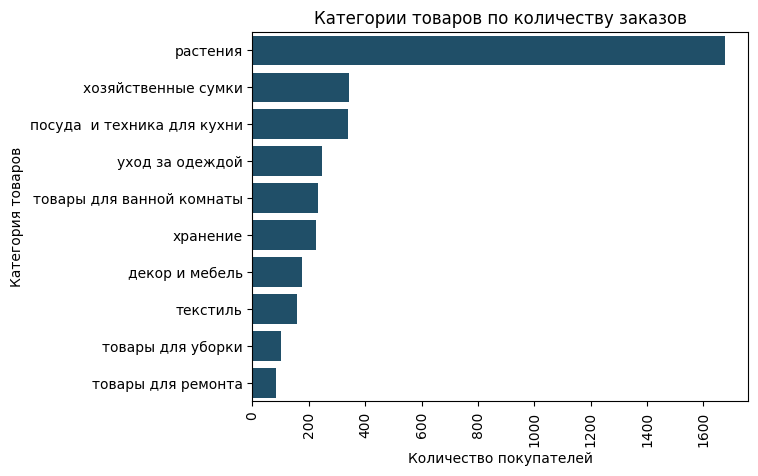

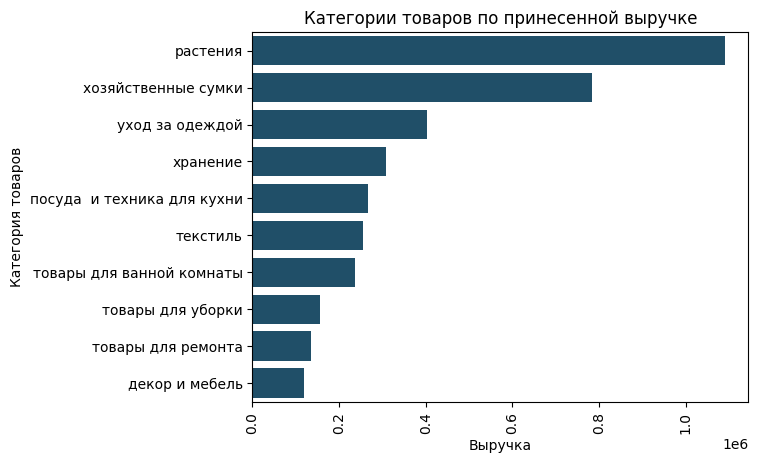

In [47]:
df_cat_customer = df.groupby('cat').agg({'customer_id':'nunique'}).reset_index().sort_values(by = 'customer_id', ascending = False)

ax = sns.barplot(x='customer_id',
            y='cat',
            data=df_cat_customer,
            color = '#145374')
 
plt.xticks(rotation=90)
ax.set_title('Категории товаров по количеству покупателей')
ax.set(xlabel='Количество покупателей', ylabel='Категория товаров')
 
plt.show()

df_cat_order = df.groupby('cat').agg({'order_id':'nunique'}).reset_index().sort_values(by = 'order_id', ascending = False)

ax = sns.barplot(x='order_id',
            y='cat',
            data=df_cat_order,
            color = '#145374')
 
plt.xticks(rotation=90)
ax.set_title('Категории товаров по количеству заказов')
ax.set(xlabel='Количество покупателей', ylabel='Категория товаров')

plt.show()

df_cat_total = df.drop(columns = ['customer_id','product', 'quantity', 'price', 'segment', 'monetary','recency','frequency', 'month_year', 'date'])
df_cat_total = df_cat_total.drop_duplicates()
df_cat_total_fin = df_cat_total.groupby('cat').agg({'total' : 'sum'})
df_cat_total_fin = df_cat_total_fin.reset_index().sort_values(by = 'total', ascending = False)

ax = sns.barplot(x='total',
            y='cat',
            data=df_cat_total_fin,
            color = '#145374')
 
plt.xticks(rotation=90)
ax.set_title('Категории товаров по принесенной выручке')
ax.set(xlabel='Выручка', ylabel='Категория товаров')
 
plt.show()

Сравнили категории товаров по трем направлениям:
- количество покупателей
- количество заказов
- выручка

Количество заказов и покупателей почти идентично. Вероятно, связано с тем, что большинство покупателей в принципе делают по 1-2 заказа. Видимо, в большинстве случаев один заказ = одна категория товаров. Больше всего заказов в категории растения - больше 1600. Следующая по убыванию категория "Посуда и техника для кухни" принесла в 4 раза меньше заказов. Далее разница между категориями не такая существенная. Меньше всего заказывают товары для уборки и товары для ремонта.


Рейтинг категорий по принесенной выручке несколько отличается. Причина либо в цене за единицу товара, либо в количестве единиц товара внутри заказа. Здесь также лидируют растения (примерно 1 млн), но с меньшим отрывом. Следующая категория - "Хозяйственные сумки" принесла 0.8 млн, далее идут товары для ухода за одеждой. Меньше всего выручки (менее 100 тыс) принесли категории "Декор и мебель" и "Товары для уборки"

### Анализ категорий покупателей

#### Распределение покупателей по категориям 

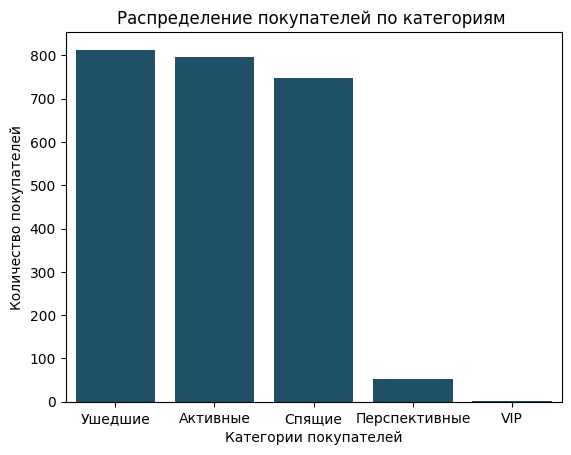

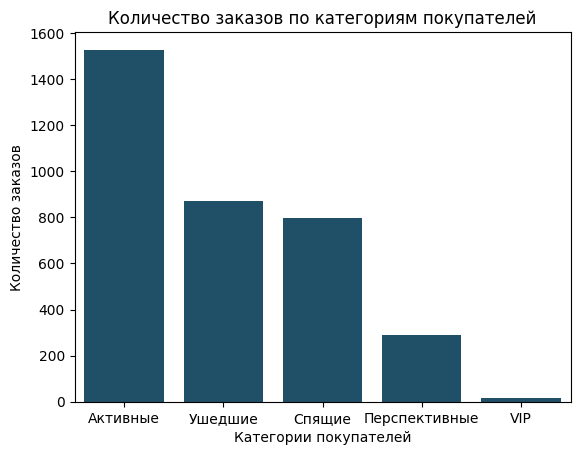

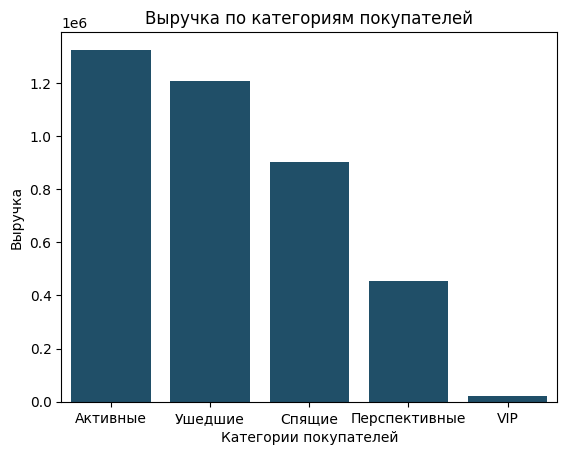

In [48]:
df_frequency_segment = df.groupby('segment').agg({'customer_id':'nunique'}).reset_index().sort_values(by = 'customer_id', ascending = False)

ax = sns.barplot(x='segment',
            y='customer_id',
            data=df_frequency_segment,
            color = '#145374')
 

ax.set_title('Распределение покупателей по категориям ')
ax.set(xlabel='Категории покупателей', ylabel='Количество покупателей')
 
plt.show()

df_segment = df.groupby('segment').agg({'order_id':'nunique'}).reset_index().sort_values(by = 'order_id', ascending = False)

ax = sns.barplot(x='segment',
            y='order_id',
            data=df_segment,
            color = '#145374')
 

ax.set_title('Количество заказов по категориям покупателей')
ax.set(xlabel='Категории покупателей', ylabel='Количество заказов')
 
plt.show()

df_for_revenue_per_cl_segment = df.drop(columns=['date', 'order_id', 'product', 'quantity', 'price', 'month_year', 'cat', 'total', 'recency','frequency', 'monetary'])
df_for_revenue_per_cl_segment = df_for_revenue_per_cl_segment.drop_duplicates()

df_for_revenue_per_cl_segment_2 = df_revenue_per_cl.drop(columns = 'month_year')
df_for_revenue_per_cl_segment_2 = df_for_revenue_per_cl_segment_2.drop_duplicates()

df_revenue_per_cl_2 = df_for_revenue_per_cl_segment_2.merge(df_for_revenue_per_cl_segment, on ='customer_id')
df_revenue_per_cl_2 = df_revenue_per_cl_2.drop(columns = 'customer_id') 
df_revenue_per_cl_2_fin = df_revenue_per_cl_2.groupby('segment').agg({'monetary':'sum'})
df_revenue_per_cl_2_fin = df_revenue_per_cl_2_fin.reset_index().sort_values(by = 'monetary', ascending = False)


ax = sns.barplot(x='segment',
            y='monetary',
            data=df_revenue_per_cl_2_fin,
            color = '#145374')
 

ax.set_title('Выручка по категориям покупателей')
ax.set(xlabel='Категории покупателей', ylabel='Выручка')    
    
    
plt.show()

- Ушедших, активных и спящик клиентов примерно по ровну (примерно по 700 человек), перспективных около 50 и один VIP.  
- Больше всего заказов (1500) и выручки (1.2 млн) принесли активные клиенты
- Ушедшие клиенты сделали почти в 2 раза меньше заказов (~850), но принесли более 1 млн выручки. То есть их средний чек был больше, чем у активных.
- По соотношению выручки и количества заказов спящие клиенты уступают ушедшим. Примерно 800 заказов и 900 тыс выручки
- У перспективных ~250 заказов, 400 тыс выручки
- VIP клиента трудно оценить по графику, изучим его отдельно

In [49]:
df_vip = df[df['segment'] == 'VIP']
df_vip

,date,customer_id,order_id,product,quantity,price,month_year,cat,total,recency,frequency,monetary,segment
4567,2019-10-02,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,72836,чайник электрический василиса т31-2000 нержаве...,1,704.0,2019-10,посуда и техника для кухни,704.0,92,17,21361.0,VIP
4592,2019-10-07,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,72881,хризантема сиреневая d-18 см,1,187.0,2019-10,растения,187.0,92,17,21361.0,VIP
4593,2019-10-07,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,72883,"кипятильник электрический 2.5 квт, 1601143",1,224.0,2019-10,посуда и техника для кухни,224.0,92,17,21361.0,VIP
4596,2019-10-07,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,72889,чайник электрический василиса т28-1800 нержаве...,1,749.0,2019-10,посуда и техника для кухни,749.0,92,17,21361.0,VIP
4620,2019-10-10,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,72913,стремянка colombo factotum 4 ступени стальная ...,1,2849.0,2019-10,товары для ремонта,2849.0,92,17,21361.0,VIP
4657,2019-10-15,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,72967,тележка багажная delta dt-22 синий грузоподъем...,1,674.0,2019-10,хозяйственные сумки,674.0,92,17,21361.0,VIP
4672,2019-10-16,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,72983,сумка-тележка хозяйственная gimi ideal синяя,1,1649.0,2019-10,хозяйственные сумки,1649.0,92,17,21361.0,VIP
4673,2019-10-16,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,72986,сумка-тележка хозяйственная rolser mnb012 azul...,1,6600.0,2019-10,хозяйственные сумки,6600.0,92,17,21361.0,VIP
4678,2019-10-16,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,72993,"таз пластмассовый 30,0 л овальный пц2913, 1404051",1,404.0,2019-10,хранение,404.0,92,17,21361.0,VIP
4679,2019-10-16,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,72996,контейнер для мусора flip bin curver 25 л граф...,1,824.0,2019-10,товары для уборки,824.0,92,17,21361.0,VIP


In [50]:
df_vip['order_id'].nunique()

17

In [51]:
df_vip['cat'].nunique()

6

In [52]:
df_vip.groupby('cat').agg({'total':'sum'}).reset_index().sort_values(by='total', ascending = False)

,cat,total
4,хозяйственные сумки,8923.0
1,растения,5883.0
2,товары для ремонта,2849.0
0,посуда и техника для кухни,1677.0
5,хранение,1205.0
3,товары для уборки,824.0


In [53]:
df_vip['total'].sum()

21361.0

VIP клиент совершил 17 заказов в течение октября 2019. Каждый заказ = одному товару. Два раза несколько заказов совершались в течение одного дня. Общая сумма принесенной выручки = 21 361. Покупатель совершил покупки в 6 разных категориях. Почти половину выручки принесли растения

#### Количество заказов и выручка по категориям покупателей по категориям товаров

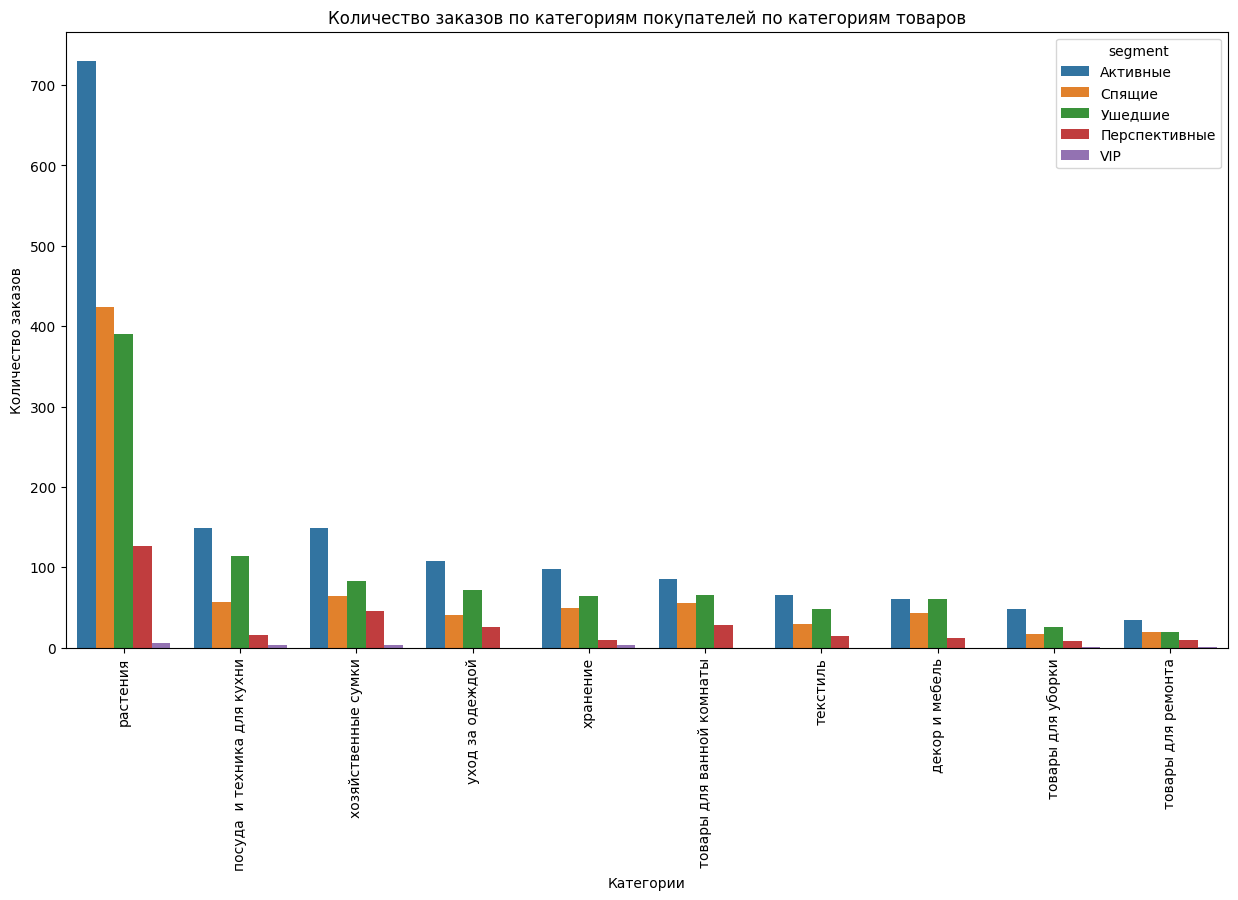

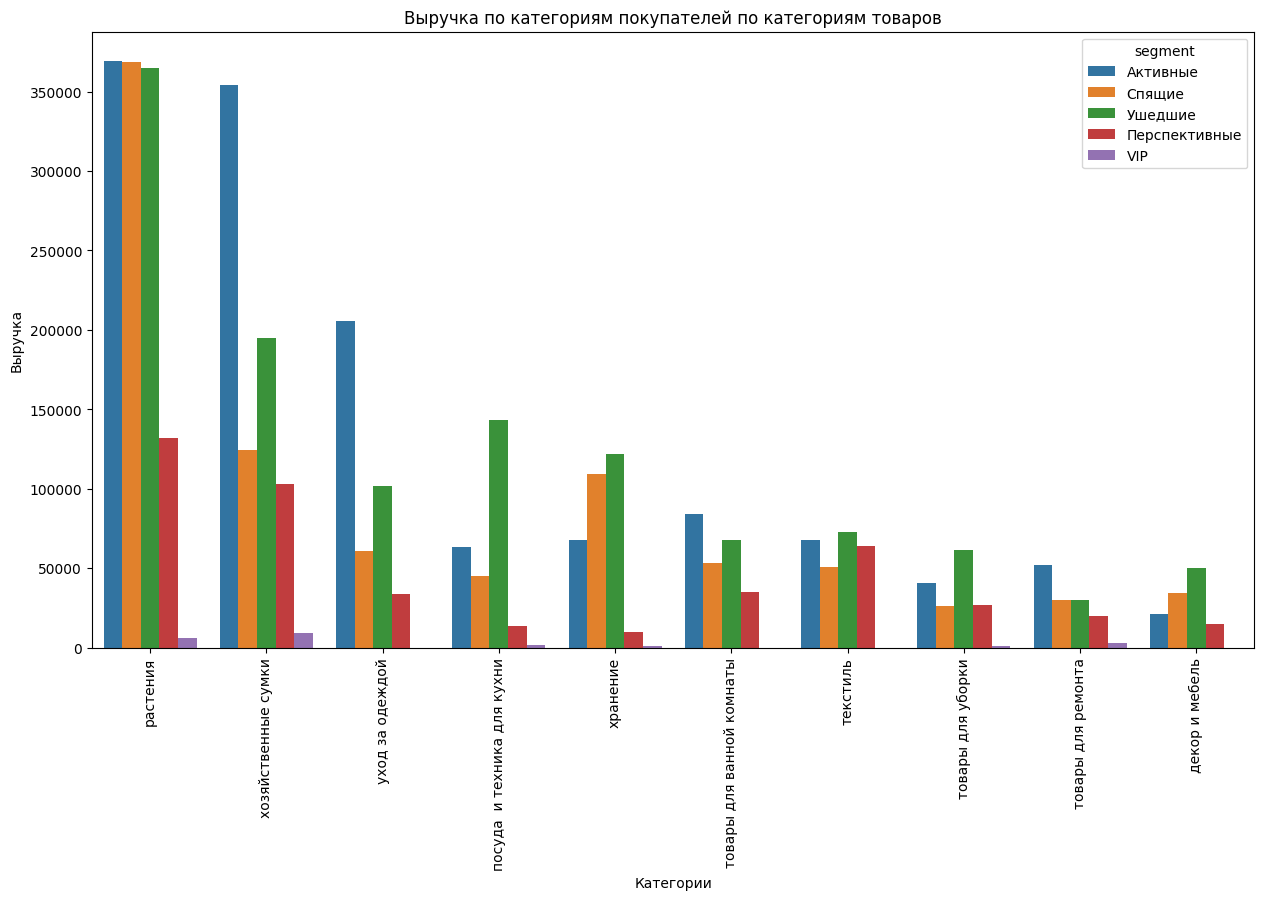

In [54]:
df_frequency_segment_cat = df.groupby(['cat', 'segment']).agg({'order_id' : 'nunique'}).reset_index().sort_values(by='order_id', ascending = False)

plt.figure(figsize = (15, 8))
ax = sns.barplot(x='cat',
            y='order_id',
            data=df_frequency_segment_cat,
            hue='segment' )
 
plt.xticks(rotation=90)
ax.set_title('Количество заказов по категориям покупателей по категориям товаров')
ax.set(xlabel='Категории', ylabel='Количество заказов')
 
plt.show()

df_total_segment_cat = df.groupby(['cat', 'segment']).agg({'total' : 'sum'}).reset_index().sort_values(by='total', ascending = False)
                                                                                                    

plt.figure(figsize = (15, 8))
ax = sns.barplot(x='cat',
            y='total',
            data=df_total_segment_cat,
            hue='segment'  )
 
plt.xticks(rotation=90)
ax.set_title('Выручка по категориям покупателей по категориям товаров')
ax.set(xlabel='Категории', ylabel='Выручка')
 
plt.show()

- Все категории покупателей совершили больше всего заказов в категории "Растения"
- Категории "Уход за одеждой" и "Хозяйственные сумки" приносят большую выручку относительно количества заказов по сравнению с другими категориями
- Почти во всех категориях товаров по выручке лидируют активные клиенты. Исключение "Посуда и техника для кухни", "Хранение", "Декор и мебель", где лидировали ушедшие клиенты
- Спящие клиенты в каждой категории (кроме текстиля) приносят большую выручку, чем перспектиные. Исключение "Хозяйственные сумки", где перспектиные обогнали спящих

#### Частота совершения заказов по категориям покупателей


In [55]:
df_frequency = df.pivot_table(index='segment', columns='frequency', values = 'customer_id', aggfunc='nunique').fillna(0)
df_frequency

frequency,1,2,3,4,5,7,17,35,126
segment,,,,,,,,,
VIP,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Активные,65.0,731.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Перспективные,0.0,34.0,13.0,2.0,1.0,1.0,0.0,1.0,1.0
Спящие,706.0,35.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0
Ушедшие,757.0,55.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


- Спящие и ушедшие клиенты в основном делают по одному заказу
- Активные в основном делают по 2 заказа
- Перспектиные делают больше чем 1 заказ, в том числе есть один клиент, который совершил 126 заказов, посморим на него ниже
- VIP клиент сделал 17 заказов

In [56]:
df_126_orders = df[df['frequency'] == 126]
df_126_orders

,date,customer_id,order_id,product,quantity,price,month_year,cat,total,recency,frequency,monetary,segment
9,2018-10-01,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,чехол для гладильной доски colombo persia beig...,1,674.0,2018-10,уход за одеждой,674.0,331,126,159508.0,Перспективные
20,2018-10-02,c971fb21-d54c-4134-938f-16b62ee86d3b,68490,чехол для гладильной доски festival 137x60 см ...,1,1162.0,2018-10,уход за одеждой,1162.0,331,126,159508.0,Перспективные
60,2018-10-03,c971fb21-d54c-4134-938f-16b62ee86d3b,68511,набор прищепок большие пластиковые rozenbal пи...,10,86.0,2018-10,товары для ванной комнаты,860.0,331,126,159508.0,Перспективные
61,2018-10-03,c971fb21-d54c-4134-938f-16b62ee86d3b,68514,сушилка для белья attribute прима 11 м синяя н...,1,749.0,2018-10,растения,749.0,331,126,159508.0,Перспективные
124,2018-10-08,c971fb21-d54c-4134-938f-16b62ee86d3b,68561,тележка багажная delta тбр-20 коричневый с ора...,1,742.0,2018-10,хозяйственные сумки,742.0,331,126,159508.0,Перспективные
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1834,2019-03-04,c971fb21-d54c-4134-938f-16b62ee86d3b,70582,нефролепис бостон d-12 см,1,292.0,2019-03,растения,292.0,331,126,159508.0,Перспективные
1836,2019-03-04,c971fb21-d54c-4134-938f-16b62ee86d3b,70589,калла крупноцветковая желтая,1,374.0,2019-03,растения,374.0,331,126,159508.0,Перспективные
1852,2019-03-05,c971fb21-d54c-4134-938f-16b62ee86d3b,70606,пеларгония розебудная red pandora укорененный ...,1,134.0,2019-03,растения,134.0,331,126,159508.0,Перспективные
1856,2019-03-05,c971fb21-d54c-4134-938f-16b62ee86d3b,70614,гладильная доска ника lora fashion hlf 123х46 см,1,1949.0,2019-03,уход за одеждой,1949.0,331,126,159508.0,Перспективные


In [57]:
df_126_orders['date'].describe()

count                              143
mean     2018-12-16 07:23:04.615384576
min                2018-10-01 00:00:00
25%                2018-11-12 00:00:00
50%                2018-12-11 00:00:00
75%                2019-01-31 12:00:00
max                2019-03-06 00:00:00
Name: date, dtype: object

In [58]:
df_126_orders['cat'].nunique()

10

In [59]:
df_126_orders.groupby('cat').agg({'total':'sum'}).reset_index().sort_values(by='total', ascending = False)

,cat,total
8,хозяйственные сумки,47606.0
2,растения,41658.0
7,уход за одеждой,28190.0
3,текстиль,11714.0
4,товары для ванной комнаты,10441.0
6,товары для уборки,8829.0
0,декор и мебель,4246.0
1,посуда и техника для кухни,2828.0
9,хранение,2618.0
5,товары для ремонта,1378.0


In [60]:
df_126_orders.groupby('order_id').agg({'product':'count'}).reset_index().sort_values(by='product', ascending = False)

,order_id,product
28,68968,6
40,69159,5
11,68604,4
31,69062,4
20,68808,2
...,...,...
41,69180,1
39,69149,1
38,69145,1
37,69144,1


Клиент c971fb21-d54c-4134-938f-16b62ee86d3b:
- Совершил 126 заказов с января 2018 по март 2019
- Покупал в 10 разных категориях, больше всего "хозяйственные сумки" = 47 606 и "растения" = 41 658
- Общая сумма принесенной выручкм = 159 508
- В одном заказе от 1 до 6 товаров

### Анализ сезонности категорий товаров 

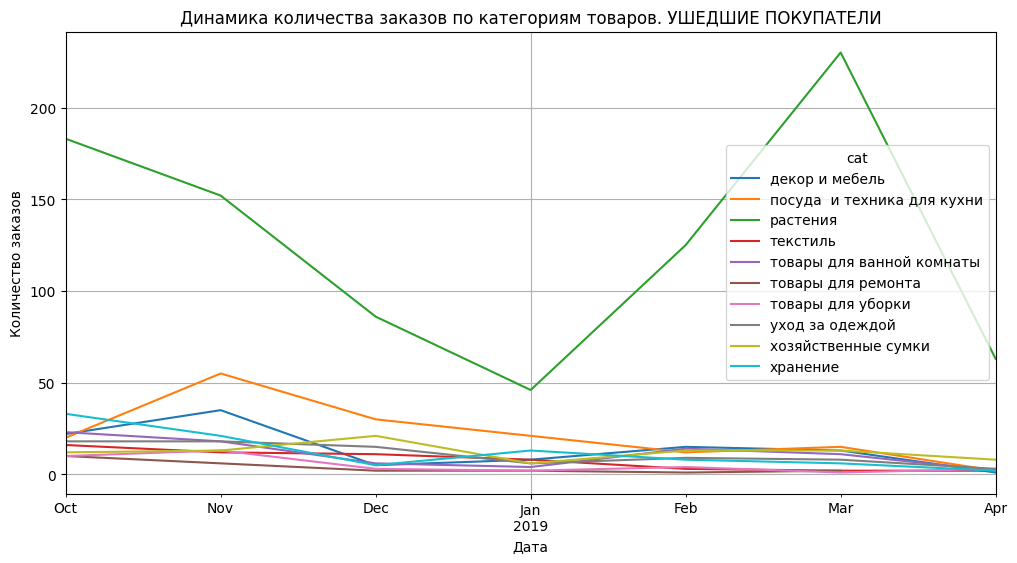

In [61]:
df_season_1 = df[df['segment'] == 'Ушедшие'].pivot_table(index= 'month_year', columns='cat', values = 'order_id', aggfunc='count')

df_season_1.plot(figsize=(12,6), grid=True)
plt.title('Динамика количества заказов по категориям товаров. УШЕДШИЕ ПОКУПАТЕЛИ')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.show()

- Ушедшие покупатели больше всего покупали растения в марте 2019 года. 
- Также был всплеск активности в ноябре 2018, когда спросом пользовались: "Посуда и техника для кухни", "Декор и мебель"
- В январе 2019 выросли покупки товаров для хранения

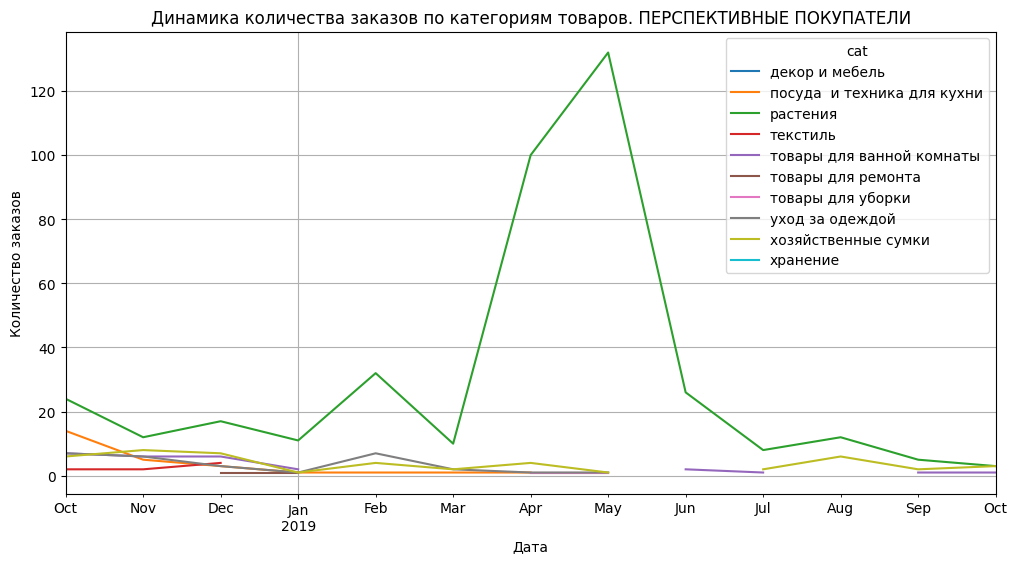

In [62]:
df_season_1 = df[df['segment'] == 'Перспективные'].pivot_table(index= 'month_year', columns='cat', values = 'order_id', aggfunc='count')

df_season_1.plot(figsize=(12,6), grid=True)
plt.title('Динамика количества заказов по категориям товаров. ПЕРСПЕКТИВНЫЕ ПОКУПАТЕЛИ')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.show()

Покупателей в категории "Перспективные" ~ 50, покупкки совершены не во всех категориях, график выглядит рваным
- По прежнему весной (апрель, май) сезон покупки растений
- Также наблюдался всплеск в декабре, феврале. Больше покупали растения, хозяйственные сумки, товары для ванной комнаты
- В апреле и августе также выросли "Хозяйственные сумки"

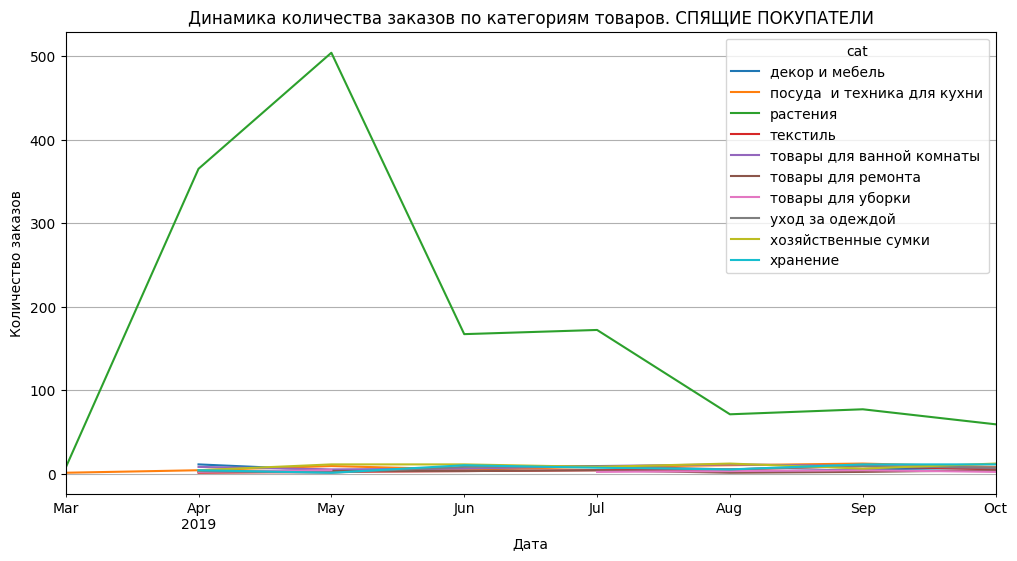

In [63]:
df_season_1 = df[df['segment'] == 'Спящие'].pivot_table(index= 'month_year', columns='cat', values = 'order_id', aggfunc='count')

df_season_1.plot(figsize=(12,6), grid=True)
plt.title('Динамика количества заказов по категориям товаров. СПЯЩИЕ ПОКУПАТЕЛИ')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.show()

У спящих клиентов более заметна разница между объемом покупок категории "Растения" и объемом всех остальных категорий. Растения, как и прежде в основом продаются в апреле, мае. Остальные категории слились в одну линию и продаются примерно одинаково

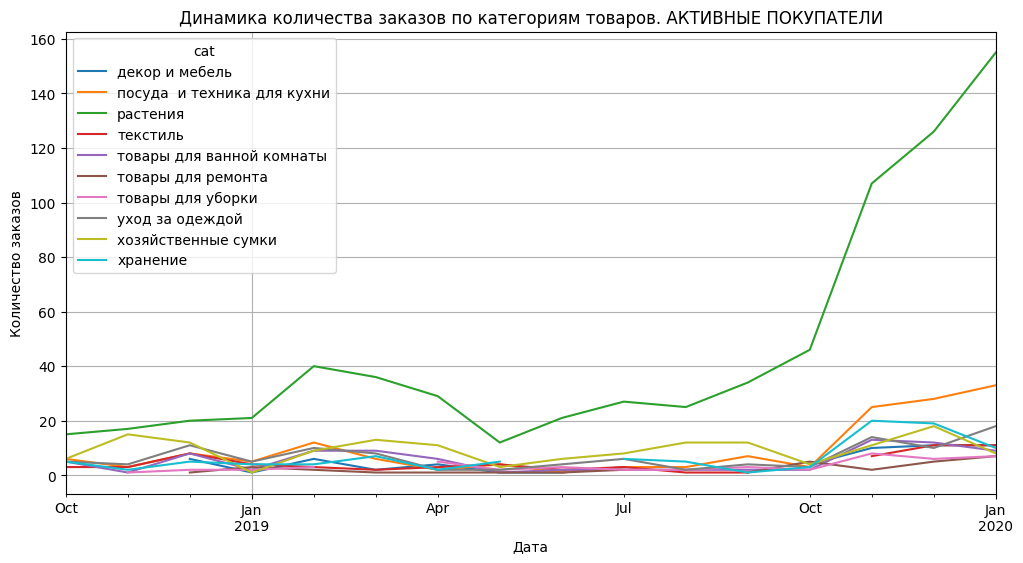

In [64]:
df_season_1 = df[df['segment'] == 'Активные'].pivot_table(index= 'month_year', columns='cat', values = 'order_id', aggfunc='count')

df_season_1.plot(figsize=(12,6), grid=True)
plt.title('Динамика количества заказов по категориям товаров. АКТИВНЫЕ ПОКУПАТЕЛИ')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.show()

- Активные клиенты покупали растения менее типично - основные продажи - январь 2020. 
- Вместе с растениями похожим спросом пользуются хозяйственные сумки
- Также есть активность в предновогодние праздники в ноябре, декабре. Покупали посуду и технику для кухни, товары для хранения, товары для ванной комнаты, а также товары по уходу за одеждой

VIP клиент покупал только в октябре 2019, график не информативен. Его покупки разобраны ранее


### Вывод по результатам исследовательского анализа

- Обладаем данными за октябрь 2018 - январь 2020. То есть полный год только один - 2019
- Данные по количеству заказов, среднему чеку и выручке показывают, что дела магазина идут на спад. 
- Самая высокая выручка зафиксирована на второй месяц рассматриваемого периода - ноябрь 2018
- Есть пики продаж в апреле-мае - закупки семян и рассады под посадку, а также в ноябре в предновогодний сезон. Январь наименее популярный по продажам месяц - естественный спад после новогодних праздников
- Лидер по количеству заказов и выручке - категория "Растения" во всех сегментах покупателей
- Товары для ухода за одеждой (гладильные доски, сушилки и т. д.) и хозяйственные сумки приносят более высокую выручку относительно количества заказов, чем остальные категории
- Наименее популярные категории : товары для ремонта и уборки

Ушедшие покупатели:
- Последний раз совершили покупку более 300 дней назад. В основном совершали один заказ. Основная активность ноябрь и март. Пришли в сезон за покупкой и больше не возвращались.

Перспективные покупатели:
- Совершили от двух заказов. Выручка от одного покупателя более 1318. Могли купить, как давно, так и в последние 100 дней. В основном покупали растения весной. Также были товары для ванной, хозяйственные сумки, товары для хранения. Среди перспектиных есть один, который совершил 126 заказов, последний раз более 100 дней назад. Всего потратил 159 508

Спящие покупатели:
- Покупали от 100 до 300 дней назад с разной частотой. В основном растения

Активные покупатели
- Покупали последний раз менее 100 дней назад. Кроме растений также интересуются посудой и техникой для кухни, товарами для хранения, хозяйственными сумками

VIP клиент:
- единственный покупатель, который совершил 17 заказов в течение октября 2019. Общая сумма принесенной выручки = 21 361. Покупатель совершил покупки в 6 разных категориях. Почти половину выручки принесли растения



## Проверка гипотез

Проверка гипотез:

Есть разница в среднем чеке пользователей, которые покупают единично и которые покупают регулярно

- H_0: Средний чек групп пользователей не отличается
- H_a: Средний чек пользователей, которые покупают регулярно выше, чем у пользователей, которые покупают единично


Есть разница в количестве категорий товаров в одном заказе между пользователями, которые покупают единично и которые покупают регулярно:

- H_0: Количество категорий в одном заказе не отличается 
- H_a: Количество категорий в одном заказе больше у пользователей, которые покупают регулярно, чем у тех, кто покупает единично

alpha = 0.05

### Гипотеза 1

In [65]:
df_hyp = df.copy()
df_hyp = df_hyp.drop(columns = ['date', 'order_id','product','quantity', 'price', 'month_year', 'cat', 'recency', 'frequency', 'monetary']) 
df_hyp_1 = df_hyp.groupby('customer_id').agg({'total':'sum'})
df_hyp_2 = df_hyp.drop(columns = ['total'])
df_hyp_2 = df_hyp_2.drop_duplicates()
df_hyp_all = df_hyp_1.merge(df_hyp_2, on = 'customer_id')

In [66]:
gr_A = df_hyp_all[(df_hyp_all.segment == "Активные")]
average_A = gr_A['total'].mean()
average_A

1664.3472571189282

In [67]:
gr_B = df_hyp_all[(df_hyp_all.segment == "Спящие")]
average_B = gr_B['total'].mean()
average_B

1206.2393048128342

In [68]:
sampleA = pd.Series(gr_A['total'])

In [69]:
sampleB = pd.Series(gr_B['total'])

Подготовили данные для проверки гипотез. Под сравнение среднего чека выбрали активных и спящих покупателей (большинство спящих покупателей сделали 1 заказ, активные 2 заказа) 

In [70]:
alpha = 0.05
alpha_corr = alpha/2

Скорректировали уровень статистической значимости, так как два теста будут проводиться на одних и тех же данных.

In [71]:
results = st.shapiro(sampleA)
p_value = results[
    1
]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha_corr:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  5.1615438313345236e-33
Отвергаем нулевую гипотезу: распределение не нормально


In [72]:
results = st.shapiro(sampleB)
p_value = results[
    1
]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha_corr:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  5.318387745177527e-45
Отвергаем нулевую гипотезу: распределение не нормально


Проверили распределение среднего чека для каждой группы критерием Шапиро. В обеих группах данные распределены не нормально.

In [73]:
print('p_value: ' "{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

if st.mannwhitneyu(sampleA, sampleB)[1] < alpha_corr:
    
    print("Отвергаем нулевую гипотезу. Средний чек пользователей, которые покупают регулярно выше, чем у пользователей, которые покупают единично")
else:
    print("Не получилось отвергнуть нулевую гипотезу. Средний чек групп пользователей не отличается") 


p_value: 0.000
Отвергаем нулевую гипотезу. Средний чек пользователей, которые покупают регулярно выше, чем у пользователей, которые покупают единично


Проверили гипотезу с помощью непараметрического теста Манна-Уитни, который применяется для ненормально распределенных данных.

### Гипотеза 2


Есть разница в количестве категорий товаров в одном заказе между пользователями, которые покупают единично и которые покупают регулярно:

- H_0: Количество категорий в одном заказе не отличается 
- H_a: Количество категорий в одном заказе больше у пользователей, которые покупают регулярно, чем у тех, кто покупает единично

In [74]:
df_ord_cat_1 = df.groupby('order_id').agg({'cat':'nunique'}).reset_index().sort_values(by='cat', ascending = False)

df_ord_cat_2 = df.drop(columns = ['date', 'product', 'quantity', 'price', 'month_year', 'cat','total', 'recency','frequency','monetary'])
df_ord_cat_2 = df_ord_cat_2.drop_duplicates()

df_ord_cat = df_ord_cat_2.merge(df_ord_cat_1)

In [75]:
gr_A_hyp_2 = df_ord_cat[(df_ord_cat.segment == "Спящие")]
average_A_hyp_2 = gr_A_hyp_2['cat'].mean()
average_A_hyp_2

1.0

In [76]:
gr_B_hyp_2 = df_ord_cat[(df_ord_cat.segment == "Активные")]
average_B_hyp_2 = gr_B_hyp_2['cat'].mean()
average_B_hyp_2

1.0

In [77]:
gr_B_hyp_2

,customer_id,order_id,segment,cat
2,6644e5b4-9934-4863-9778-aaa125207701,68478,Активные,1
5,86432d8d-b706-463b-bd5d-6a9e170daee3,68484,Активные,1
8,a576fa59-7b28-4a4c-a496-92f128754a94,68487,Активные,1
20,494a90f5-2198-4212-8fc9-e3e22ad7afd9,68505,Активные,1
29,1e17318f-c4f1-4d0f-8ee4-9bf976c5b4ef,68517,Активные,1
...,...,...,...,...
3495,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,Активные,1
3496,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,Активные,1
3497,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,Активные,1
3498,cdd17932-623e-415f-a577-3b31312fd0e2,102002,Активные,1


In [78]:
sampleA_hyp_2 = pd.Series(gr_A_hyp_2['cat'])

In [79]:
sampleB_hyp_2 = pd.Series(gr_B_hyp_2['cat'])

Подготовили данные для проверки гипотез. Сравниваем количество категорий внутри заказа для спящих и активных клиентов

In [80]:
results = st.shapiro(sampleA_hyp_2)
p_value = results[
    1
]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha_corr:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  1.0
Не получилось отвергнуть нулевую гипотезу, всё нормально


In [81]:
results = st.shapiro(sampleB_hyp_2)
p_value = results[
    1
]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha_corr:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  1.0
Не получилось отвергнуть нулевую гипотезу, всё нормально


Применили критерий Шапиро к обеим выборкам - в обоих случаях не удалось отвергнуть нулевую гипотезу о нормальном распределении.

In [82]:
results = st.ttest_ind(sampleA_hyp_2, sampleB_hyp_2)
                         
print(results.pvalue)

if results.pvalue < alpha_corr:
    
    print("Отвергаем нулевую гипотезу. Количество категорий в одном заказе больше у пользователей, которые покупают регулярно, чем у тех, кто покупает единично")
else:
    print("Не получилось отвергнуть нулевую гипотезу. Количество категорий в одном заказе не отличается") 

nan
Не получилось отвергнуть нулевую гипотезу. Количество категорий в одном заказе не отличается


In [83]:
sampleA_hyp_2

1371    1
1379    1
1408    1
1435    1
1485    1
       ..
2689    1
2690    1
2691    1
2692    1
2693    1
Name: cat, Length: 798, dtype: int64

In [84]:
sampleA_hyp_2.nunique()

1

In [85]:
sampleB_hyp_2

2       1
5       1
8       1
20      1
29      1
       ..
3495    1
3496    1
3497    1
3498    1
3499    1
Name: cat, Length: 1527, dtype: int64

In [86]:
sampleB_hyp_2.nunique()

1

Количество категорий в одном заказе у активных и спящих покупателей проверили с помощью Independent two-sample t-test. Так как данные распределены нормально, а мы сравниваем значения двух независимых групп. Не получилось отвергнуть нулевую гипотезу, нет различия в количестве категорий внутри одного заказа между группами. Проверили, что  в каждом заказе этих групп были товары только одной категории

### Тест Краскала-Уоллиса для Активных, Спящих и Ушедших пользователей

In [87]:
gr_A = df_hyp_all[(df_hyp_all.segment == "Активные")]
sampleA = pd.Series(gr_A['total'])

In [88]:
gr_B = df_hyp_all[(df_hyp_all.segment == "Спящие")]
sampleB = pd.Series(gr_B['total'])

In [89]:
gr_C = df_hyp_all[(df_hyp_all.segment == "Ушедшие")]
sampleC = pd.Series(gr_C['total'])

In [90]:
result = st.kruskal(sampleA, sampleB, sampleC)
p_value =  results[1]

if p_value < alpha_corr:
    
    print("Отвергаем нулевую гипотезу. Средний чек пользователей, которые покупают регулярно выше, чем у пользователей, которые покупают единично")
else:
    print("Не получилось отвергнуть нулевую гипотезу. Средний чек групп пользователей не отличается") 

Не получилось отвергнуть нулевую гипотезу. Средний чек групп пользователей не отличается


### Вывод по результатам проверки гипотез

- Средний чек активных пользователей выше, чем у спящих.
- Не удалось подтвердить гипотезу о различии в количестве категорий товаров внутри заказов между спящими и активными пользователями

## Все выводы в одном месте + рекомендации

- Удалили явные и неявные дубликты. Они выявились после приведения названий товаров к нижнему регистру. Также были удалены 20 заказов, в которых было более одной даты.
- Удалили один аномальный заказ на 675 000.
- Добавили столбец с категориями товаров по спискам ключевых слов, сформированным вручную
- Добавили столбец с категориями покупателей. Для этого использовали RFM-анализ. Проставили каждому покупателю значение частоты покупок, давности последней покупки и выручки. Границы для выбора значений выручки и давности покупок, выбрали исходя из 33го и 66го процентилей. В случае с частотой покупок деление было на 1, 2 и более заказов. 

- Обладаем данными за октябрь 2018 - январь 2020. То есть полный год только один - 2019
- Данные по количеству заказов, среднему чеку и выручке показывают, что дела магазина идут на спад. 
- Самая высокая выручка зафиксирована на второй месяц рассматриваемого периода - ноябрь 2018
- Есть пики продаж в апреле-мае - закупки семян и рассады под посадку, а также в ноябре в предновогодний сезон. Январь наименее популярный по продажам месяц - естественный спад после новогодних праздников
- Лидер по количеству заказов и выручке - категория "Растения" во всех сегментах покупателей
- Товары для ухода за одеждой (гладильные доски, сушилки и т. д.) и хозяйственные сумки приносят более высокую выручку относительно количества заказов, чем остальные категории
- Наименее популярные категории : товары для ремонта и уборки

Ушедшие покупатели:
- Последний раз совершили покупку более 300 дней назад. В основном совершали один заказ. Основная активность ноябрь и март. Пришли в сезон за покупкой и больше не возвращались.

Перспективные покупатели:
- Совершили от двух заказов. Выручка от одного покупателя более 1318. Могли купить, как давно, так и в последние 100 дней. В основном покупали растения весной. Также были товары для ванной, хозяйственные сумки, товары для хранения. Среди перспектиных есть один, который совершил 126 заказов, последний раз более 100 дней назад. Всего потратил 159 508

Спящие покупатели:
- Покупали от 100 до 300 дней назад с разной частотой. В основном растения

Активные покупатели
- Покупали последний раз менее 100 дней назад. Кроме растений также интересуются посудой и техникой для кухни, товарами для хранения, хозяйственными сумками

VIP клиент:
- Единственный покупатель, который совершил 17 заказов в течение октября 2019. Общая сумма принесенной выручки = 21 361. Покупатель совершил покупки в 6 разных категориях. Почти половину выручки принесли растения
- Средний чек активных пользователей выше, чем у спящих.
- Не удалось подтвердить гипотезу о различии в количестве категорий товаров внутри заказов между спящими и активными пользователями

**Рекомендации**

- Ушедшие пользователи. Сделать рассылку в конце февраля по категории растения. 
- Перспективные пользователи. Сделать рассылку в конце февраля по категории растения, в конце октября рассылка с разными категориями в одном письме: по товарам для хранения, ванной, хозяйственным сумкам, товарам для кухни
- Спящие пользователи. Сделать рассылку в конце февраля по категории растения 
- Активные пользователи. Хорошо покупают не только растения. В конце октября рассылка с разными категориями в одном письме: по товарам для хранения, ванной, хозяйственным сумкам, товарам для кухни
- VIP клиент покупал только в октябре, но разные товары на большую сумму. Можно отправить письмо в конце февраля с подборкой разных категорий, в  первую очередь растения.